<a href="https://colab.research.google.com/github/AnnasMazhar/Data-Science-Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gold Price Prediction

#Importing Dependencies


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Dataset import https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# num of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# info on dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# check for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting statistical measures of the dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = gold_data.corr()

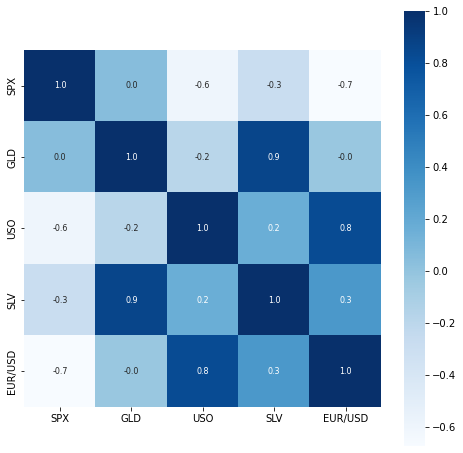

In [13]:
# constructing heatmap to observe and understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


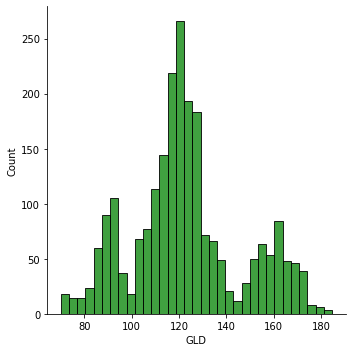

In [17]:
# check distribution of gold prices
sns.displot(gold_data['GLD'], color='green')

#Splitting features and Target

In [18]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Testing and Training

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#Model Evaluation

In [25]:
# tests data predictions
test_data_pred = regressor.predict(X_test)
print(test_data_pred)

[168.58019944  81.89729992 116.16670059 127.64400075 120.59150121
 154.89599761 149.83059781 126.15220025 117.39639899 126.14780031
 116.69880104 171.93980068 141.27009904 167.64269823 115.24079998
 117.48600023 137.98730269 169.9175011  159.1590039  157.78169923
 155.20410013 124.99219993 176.12029947 156.89010363 125.17730047
  93.72220003  77.36150016 120.43089997 119.11039923 167.61070052
  88.10450011 125.15470005  91.11590073 117.68380001 121.17669937
 136.5431008  115.34850101 115.03360086 148.45580001 107.09520114
 104.31510258  87.14779779 126.54260024 118.0946999  152.36119923
 119.78970004 108.39920004 108.25689816  93.10960052 127.27309725
  75.17890015 113.70059945 121.24210019 111.1580989  118.90899904
 120.92459938 158.44940086 169.33250136 147.24629698  85.5422984
  94.36440026  86.85439918  90.5618     118.8464009  126.38640058
 127.52510022 170.55519929 122.27429931 117.40469896  98.73160041
 168.40530142 142.84089838 132.27020234 121.15660235 120.72969943
 119.529500

In [27]:
# R squared eror
error_score = metrics.r2_score(test_data_pred, Y_test)
print("r squared error: ", error_score)

r squared error:  0.9885323006813755


Compare Actual and Predicted Values

In [28]:
Y_test = list(Y_test)

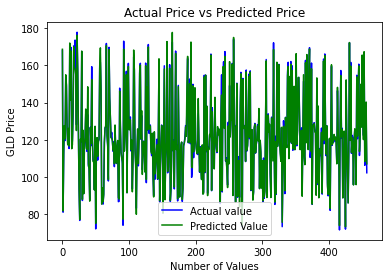

In [30]:
plt.plot(Y_test, color='blue', label='Actual value')
plt.plot(test_data_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

This model demonstrates quite high level of accuracy.